![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 002 - Part I

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 31/03/2023 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0002Part001.ipynb)

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

## Guidelines

 - Fill the full names of the team memebers in the `Team Members` section.
 - Answer all questions within the Jupyter Notebook.
 - Open questions are in part I of the exercise.
 - Coding based questions are in the subsequent notebooks.
 - Use MarkDown + MathJaX + Code to answer.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for question.
 - Good Luck!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Algebra

The Frobenius Norm ${\left\| \cdot \right\|}_{F} : \mathbb{R}^{m \times n} \to \mathbb{R}^{+}$ is defined as ${\left\| A \right\|}_{F} = \sum_{i} \sum_{j} {A}_{ij}^{2}$.

### 1.1. Question

Let $A \in \mathbb{R}^{m \times n}$ and ${\lambda}_{i} \left( M \right)$ is the $i$ -th eigen value of the matrix $M$ (Assuming $M$ has a valid eigen decomposition).  
Prove that ${\left\| A \right\|}_{F} = \sum_{i = 1}^{n} {\lambda}_{i} \left( {A}^{T} A \right)$.  

* <font color='brown'>(**#**)</font> Make sure to show why ${\lambda}_{i} \left( {A}^{T} A \right)$ exists.

### 1.1. Solution

Define $M = A^{T}A$.\
$M$ is symmetric.\
Any symmetric matrix is orthonormally diagonalizable, so there exists an orthonormal set of eigenvectors $\{\vec{u}_1, ..., \vec{u}_n\}$, such that $U^TMU = U^TA^TAU = D$.\
$D$ is a diagonal matrix with eigenvalue $\{\lambda_1, ... \lambda_n\}$ (eigenvalues are also real)\
$UU^T = U^TU = I$ ($U$ being the matrix of eigenvectors $\{\vec{u}_1, ..., \vec{u}_n\}$).

Therefore:\
${\left\| A \right\|}^2_{F} = \operatorname{Tr}(A^{T}A) = \operatorname{Tr}(A^{T}AI) = \operatorname{Tr}(A^{T}AUU^T) = \operatorname{Tr}(U^TA^{T}AU) = \operatorname{Tr}(D)= \sum_{i = 1}^{n} {\lambda}_{i} \left( {A}^{T} A \right)$

---

A matrix $Q \in \mathbb{R}^{n \times n}$ is called a positive definite matrix if and only if $\forall \boldsymbol{x} \in \mathbb{R}^{n} \setminus \left\{ \boldsymbol{0} \right\}, \; \boldsymbol{x}^{T} Q \boldsymbol{x} > \boldsymbol{0}$.

* <font color='brown'>(**#**)</font> The following are the common notations:

$\boldsymbol{S}^{N}      = \left\{ X \in \mathbb{R}^{n \times n} \mid X = {X}^{T} \right\}$ (Symmetric matrices).\
$\boldsymbol{S}^{N}_{+}  = \left\{ X \in \mathbb{R}^{n \times n} \mid X \succeq 0 \right\}$ (Positive semi definite matrices which are symmetric).\
$\boldsymbol{S}^{N}_{++} = \left\{ X \in \mathbb{R}^{n \times n} \mid X \succ 0 \right\}$ (Positive definite matrices which are symmetric).

### 1.2. Question

Let $Q \in \mathbb{R}^{n \times n}$ be a positive definite matrix. Show that ${\left\| \boldsymbol{x} \right\|}_{Q} = \sqrt{\boldsymbol{x}^{T} Q \boldsymbol{x}}$ is a norm.

### 1.2. Solution

Using the same terminology of 1.1, if $Q$ is positive definite (and symmetric), we can assume $Q$ is diagonalizable by a matrix $U$ being the matrix of eigenvectors $\{\vec{u}_1, ..., \vec{u}_n\}$ with eigenvectors $\{\lambda_1, ... \lambda_n\}$, such that $Q = U^TDU$.\
Using all that we find:\
${\left\| \boldsymbol{x} \right\|}_{Q}^2 = \boldsymbol{x}^{T} Q \boldsymbol{x} = \boldsymbol{x}^{T} U^TDU \boldsymbol{x}  = (\sum_i^n x_i\vec{u}_i)^TD(\sum_i^n x_i\vec{u}_i) = \sum_i^n \lambda_i x_i^2$

With this we show ${\left\| \boldsymbol{x} \right\|}_{Q}$ is a norm:
- **Non-Negativity**\
For a positive definite $Q$ all eigenvalues $\{\lambda_1, ... \lambda_n\}$ are strictly positive.\
Therefore ${\left\| \boldsymbol{x} \right\|}_{Q}^2 = \sum_i^n \lambda_i x_i^2 \geq 0 \quad \forall x \in \mathbb{R}^n$\
$\implies {\left\| \boldsymbol{x} \right\|}_{Q} = \sqrt{\boldsymbol{x}^{T} Q \boldsymbol{x}} \geq 0 $ with equality for $\boldsymbol{x} = \boldsymbol{0}$.\
Furthermore, $\sum_i^n \lambda_i x_i^2 = 0 \implies x_i=0 \quad \forall i \implies \boldsymbol{x} = \boldsymbol{0}$
- **Scalar Linearity**\
$\forall s \in \mathbb{R}, \boldsymbol{x} \in \mathbb{R}^n$\
${\left\| s\boldsymbol{x} \right\|}_{Q} = \sqrt{s\boldsymbol{x}^{T} Q s\boldsymbol{x}} = \sqrt{s^2\boldsymbol{x}^{T} Q \boldsymbol{x}} = \left|s\right|\cdot \sqrt{\boldsymbol{x}^{T} Q \boldsymbol{x}} = \left|s\right|\cdot{\left\| \boldsymbol{x} \right\|}_{Q}$
- **Triangle Inequality**\
${\left\| \boldsymbol{x+y} \right\|}_{Q}^2 = \sum_i^n \lambda_i (x_i+y_i)^2 = \sum_i^n \lambda_i x_i^2 + \sum_i^n \lambda_i y_i^2 + 2\sum_i^n \lambda_i x_i y_i = {\left\| \boldsymbol{x} \right\|}_{Q}^2 +{\left\| \boldsymbol{y} \right\|}_{Q}^2+ 2\sum_i^n \lambda_i x_i y_i$

Now we can define two vectors $\boldsymbol{u}, \boldsymbol{v}:$\
$\boldsymbol{u}_i = \sqrt{\lambda_i}x_i, \boldsymbol{v}_i = \sqrt{\lambda_i}y_i$\
Therefore $\sum_i^n \lambda_i x_i y_i = \left<\boldsymbol{u}, \boldsymbol{v} \right>$\
Using Cauchy-Schwarz inequality:\
$\sum_i^n \lambda_i x_i y_i = \left<\boldsymbol{u}, \boldsymbol{v} \right> \leq {\left\| \boldsymbol{u} \right\|}_2\cdot {\left\| \boldsymbol{v} \right\|}_2 = \sqrt{\lambda \circ \boldsymbol{x}^T\boldsymbol{x}\cdot\lambda \circ \boldsymbol{y}^T\boldsymbol{y}} = \sqrt{(\sum_i^n \lambda_i x_i^2)(\sum_i^n \lambda_i y_i^2)} = \sqrt{{\left\| \boldsymbol{x} \right\|}_{Q}^2 {\left\| \boldsymbol{y} \right\|}_{Q}^2} = {\left\| \boldsymbol{x} \right\|}_{Q} {\left\| \boldsymbol{y} \right\|}_{Q}$,\
where $\circ$ is the Hadamard operator.

In conclusion:\
${\left\| \boldsymbol{x+y} \right\|}_{Q}^2 ={\left\| \boldsymbol{x} \right\|}_{Q}^2 +{\left\| \boldsymbol{y} \right\|}_{Q}^2+ 2\sum_i^n \lambda_i x_i y_i \leq {\left\| \boldsymbol{x} \right\|}_{Q}^2 +{\left\| \boldsymbol{y} \right\|}_{Q}^2+ 2{\left\| \boldsymbol{x} \right\|}_{Q} {\left\| \boldsymbol{y} \right\|}_{Q} = ({\left\| \boldsymbol{x} \right\|}_{Q}+ {\left\| \boldsymbol{y} \right\|}_{Q})^2 $\
$\implies \left\| \boldsymbol{x+y} \right\|_Q \leq {\left\| \boldsymbol{x} \right\|}_{Q}+ {\left\| \boldsymbol{y} \right\|}_{Q}$

---

A matrix $U \in \mathbb{R}^{n \times n}$ is called an _orthogonal matrix_ if and only if ${U}^{T} U = U {U}^{T} = {U}^{-1} U = U {U}^{-1} = I$.

* <font color='brown'>(**#**)</font> For matrices over $\mathbb{C}$ we call such matrices a unitary matrices.

### 1.3. Question

Show that for any orthogonal matrix $U$ is an isometry with respect to the euclidean norm, that is ${\left\| U \boldsymbol{x} \right\|}_{2} = {\left\| x \right\|}_{2}$.

### 1.3. Solution
$\forall \boldsymbol{x} \in \mathbb{R}^n$ and orthogonal $U \in \mathbb{R}^{n \times n}$\
${\left\| U \boldsymbol{x} \right\|}_{2} = \sqrt{(U\boldsymbol{x})^TU\boldsymbol{x}} = \sqrt{(\boldsymbol{x}^TU^TU\boldsymbol{x}} = \sqrt{\boldsymbol{x}^TI\boldsymbol{x}} = \sqrt{\boldsymbol{x}^T\boldsymbol{x}} = {\left\| x \right\|}_{2}$.

---

The matrix $R = \begin{bmatrix} \cos \left( \theta \right) & - \sin \left( \theta \right) \\ \sin \left( \theta \right) & \cos \left( \theta \right) \end{bmatrix}$ is called a rotation matrix.

### 1.4. Question

For the set of matrices of size $2 \times 2$, Prove or disprove:

 - The matrix $R$ is a orthogonal matrix.
 - Any orthogonal matrix is a rotation matrix.

### 1.4. Solution

- The matrix $R$ is a orthogonal matrix - **proof**:


$R^TR = \begin{bmatrix} \cos \left( \theta \right) &  \sin \left( \theta \right) \\ -\sin \left( \theta \right) & \cos \left( \theta \right) \end{bmatrix} \begin{bmatrix} \cos \left( \theta \right) & - \sin \left( \theta \right) \\ \sin \left( \theta \right) & \cos \left( \theta \right) \end{bmatrix}  = \begin{bmatrix} \cos^2 \left( \theta \right) + \sin^2 \left( \theta \right) &  \sin \left( \theta \right) \cos \left( \theta \right)-\sin \left( \theta \right) \cos \left( \theta \right) \\ \sin \left( \theta \right) \cos \left( \theta \right)-\sin \left( \theta \right) \cos \left( \theta \right) &  \cos^2 \left( \theta \right) + \sin^2 \left( \theta \right) \end{bmatrix} =  \begin{bmatrix} 1 &  0 \\ 0 & 1 \end{bmatrix} = I$



$RR^T = \begin{bmatrix} \cos \left( \theta \right) &  -\sin \left( \theta \right) \\ \sin \left( \theta \right) & \cos \left( \theta \right) \end{bmatrix} \begin{bmatrix} \cos \left( \theta \right) & \sin \left( \theta \right) \\ -\sin \left( \theta \right) & \cos \left( \theta \right) \end{bmatrix}  = \begin{bmatrix} \cos^2 \left( \theta \right) + \sin^2 \left( \theta \right) &  \sin \left( \theta \right) \cos \left( \theta \right)-\sin \left( \theta \right) \cos \left( \theta \right) \\ \sin \left( \theta \right) \cos \left( \theta \right)-\sin \left( \theta \right) \cos \left( \theta \right) &  \cos^2 \left( \theta \right) + \sin^2 \left( \theta \right) \end{bmatrix} =  \begin{bmatrix} 1 &  0 \\ 0 & 1 \end{bmatrix} = I$



$\implies R^{-1} = R^T$\
Therefore, $R$ is an orthogonal matrix.



- Any orthogonal matrix is a rotation matrix - **disprove by counter example**:

We can look at a matrix which is the composition of a rotation and a reflection.\
$S = \begin{bmatrix} \cos \left( \theta \right) &  -\sin \left( \theta \right) \\ \sin \left( \theta \right) & \cos \left( \theta \right) \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} =  \begin{bmatrix} \cos \left( \theta \right) &  \sin \left( \theta \right) \\ \sin \left( \theta \right) & -\cos \left( \theta \right) \end{bmatrix}$

$S$ is symmetric and we can show that $S^TS = SS^T = S^2 = I$:

$S^TS = \begin{bmatrix} \cos \left( \theta \right) &  \sin \left( \theta \right) \\ \sin \left( \theta \right) & -\cos \left( \theta \right) \end{bmatrix} \begin{bmatrix} \cos \left( \theta \right) &  \sin \left( \theta \right) \\ \sin \left( \theta \right) & -\cos \left( \theta \right) \end{bmatrix}  = \begin{bmatrix} \cos^2 \left( \theta \right) + \sin^2 \left( \theta \right) &  \sin \left( \theta \right) \cos \left( \theta \right)-\sin \left( \theta \right) \cos \left( \theta \right) \\ \sin \left( \theta \right) \cos \left( \theta \right)-\sin \left( \theta \right) \cos \left( \theta \right) &  \cos^2 \left( \theta \right) + \sin^2 \left( \theta \right) \end{bmatrix} =  \begin{bmatrix} 1 &  0 \\ 0 & 1 \end{bmatrix} = I$




Such a matrix is also orthogonal, but it cannot be a rotation matrix, since there is no solution to:\
$\begin{cases} \sin \left( \theta \right) = - \sin \left( \theta \right) \\ \cos \left( \theta \right) = - \cos \left( \theta \right) \end{cases} $

(In other words, we cannot in general obtain the result of reflection by rotation)



---

## 2. Optimization

A twice differentiable function is convex if and only if ${\nabla}^{2} f \left( \boldsymbol{x} \right) \succeq 0$. 

### 2.1. Question

Consider the function $f \left( \boldsymbol{x} \right) : \mathbb{R}^{n}_{++} \to \mathbb{R}_{-}$ where $f \left( \boldsymbol{x} \right) = -\sqrt[^n]{ {x}_{1} {x}_{2} \ldots {x}_{n} }$.  
Show that $ f\left( \boldsymbol{x} \right)$ is a convex function.

### 2.1. Solution

We shall calculate the Hessian $H$ of the function $f \left( \boldsymbol{x} \right) = -\sqrt[^n]{ {x}_{1} {x}_{2} \ldots {x}_{n} }$.\
We will then show that $\forall \boldsymbol{y} \in \mathbb{R}^n \quad y^THy \geq 0$
<br>
$f \left( \boldsymbol{x} \right) = -\sqrt[^n]{ {x}_{1} {x}_{2} \ldots {x}_{n} } = -x_1^{\frac 1 n}x_2^{\frac 1 n}... x_n^{\frac 1 n}$\
$\frac{\partial{f}}{\partial{x_1}} = -\frac 1 n x_1^{\frac 1 n - 1}x_2^{\frac 1 n}... x_n^{\frac 1 n} = \frac 1 n f \left( \boldsymbol{x} \right)x_1^{-1}$\
From symmetry of all components we get:\
$\nabla{f \left( \boldsymbol{x} \right)} = \frac 1 n f \left( \boldsymbol{x} \right)\begin{bmatrix} {x}^{-1}_{1} \\ {x}^{-1}_{2} \\ \vdots \\ {x}^{-1}_{n} \end{bmatrix}$
<br>
For the second derivative we note that:

$\frac{\partial^2{f}}{\partial{x_i}\partial{x_j}} = \begin{cases} \frac 1{n^2}f \left( \boldsymbol{x} \right){x}^{-1}_{i}{x}^{-1}_{j}\quad \text{for} \quad i \neq j \\ \frac {1-n}{n^2}f \left( \boldsymbol{x} \right){x}^{-1}_{i}{x}^{-1}_{j} = \frac {1}{n^2}f \left( \boldsymbol{x} \right){x}^{-1}_{i}{x}^{-1}_{j} - \frac {n}{n^2}f \left( \boldsymbol{x} \right){x}^{-1}_{i}{x}^{-1}_{j}\quad\text{for} \quad i = j \end{cases} $


In matrix form:
$H = \nabla^2 f \left( \boldsymbol{x} \right) = \frac 1 {n^2} f \left( \boldsymbol{x} \right)
\begin{bmatrix} 
(1-n)x_1^{-2} & x_1^{-1}x_2^{-1} & x_1^{-1}x_3^{-1} & \dots & x_1^{-1}x_n^{-1} \\
x_2^{-1}x_1^{-1} & (1-n)x_2^{-2} & 0 & \dots & 0 \\
\vdots &  & \ddots &  &  \\
x_n^{-1}x_1^{-1} &  &   &   & (1-n)x_n^{-2} 
\end{bmatrix}$


$\forall \boldsymbol{y} \in \mathbb{R}^n \quad \boldsymbol{y}^TH\boldsymbol{y} = \frac 1 {n^2} {f \left( \boldsymbol{x} \right)}\left[ \sum_{ij}\frac{y_iy_j}{x_ix_j} - n\sum_{i}\frac{y_i^2}{x_i^2}\right] = \frac 1 {n^2} {f \left( \boldsymbol{x} \right)}\left[ \left( \sum_{i}\frac{y_i}{x_i}\right)^2 - n\sum_{i}\frac{y_i^2}{x_i^2}\right]$


Since $f \left( \boldsymbol{x} \right)$ is never positive, we can show that the term in parentheses is never positive, so the multiplication is never negative.

We can use the Cauchy Schwarz inequality with two vectors $\boldsymbol{u}, \boldsymbol{v}$ such that $u_i = 1 $, $v_i = \frac{y_i}{x_i}$.

Putting all this together we get:


$\left( \sum_{i}\frac{y_i}{x_i}\right)^2 = \left(\sum_{i}1\cdot\frac{y_i}{x_i}\right)^2 = \left<\boldsymbol{u}, \boldsymbol{v} \right>^2 \leq \left\|\boldsymbol{u}\right\|^2\cdot \left\|\boldsymbol{v}\right\|^2 = \sum_{j}1^2 \sum_{i}\frac{y_i^2}{x_i^2} = n\sum_{i}\frac{y_i^2}{x_i^2}$\
$\implies \left( \sum_{i}\frac{y_i}{x_i}\right)^2 - n\sum_{i}\frac{y_i^2}{x_i^2}\leq 0$

To conclude:\
$\forall \boldsymbol{y} \in \mathbb{R}^n \quad \boldsymbol{y}^TH\boldsymbol{y} \geq 0$\
$\implies {\nabla}^{2} f \left( \boldsymbol{x} \right) \succeq 0$\
$\implies f \left( \boldsymbol{x} \right)$ is a convex function. 



---

### 2.2. Question

Find the global minimum and maximum points of the linear function $f \left( x, y \right) = 7 x + 12 y$ over the set $\mathcal{S} = \left\{ \left( x, y \right) \mid 2 {x}^{2} + 6 x y + 9 {y}^{2} - 2 x - 6 y \leq 24 \right\}$.

### 2.2. Solution
We will use the Lagrange multiplier method

$f \left( x, y \right) = 7 x + 12 y$ \
$g \left( x, y \right) = 2 {x}^{2} + 6 x y + 9 {y}^{2} - 2 x - 6 y -24 \leq 0 $

We write the Lagrangian as:\
$\mathcal{L} \left( x, y, \lambda \right) = f \left( x, y \right) + \lambda g \left( x, y \right)$.\
$\implies \frac{\partial \mathcal{L}}{\partial x} = 7+\lambda(4x + 6y-2) = 0 $\
$\frac{\partial \mathcal{L}}{\partial y} = 12+\lambda(6x + 18y-6) = 0 $\
$\frac{\partial \mathcal{L}}{\partial \lambda} = g \left( x, y \right) = 0$

Although solved by hand... we can let the computer solve this:

In [ ]:
%pip install sympy

In [3]:
import sympy

x, y, l = sympy.symbols("x y l", real=True)

eq1 = sympy.Eq(l*(4*x+6*y-2)+7, 0)
eq2 = sympy.Eq(l*(6*x+18*y-6)+12, 0)
eq3 = sympy.Eq(2*x**2 + 6*x*y + 9*y**2-2*x-6*y-24, 0)

sympy.solve([eq1, eq2, eq3])

[{l: -1/2, x: 3, y: 2/3}, {l: 1/2, x: -3, y: 0}]

We will get our global minimum for the result with positive $\lambda$:\
$\{\lambda = \frac 1 2 , x = -3, y = 0 \}$\
$f(-3, 0) = -21$ 
<br>

The other point represents the maximum (with negative $\lambda$):\
$\{\lambda = -\frac 1 2 , x = 3, y = \frac 2 3 \}$\
$f(3, \frac 2 3) = 21 + 8 = 29$ 


---

## 3. K-Means

The K-Means objective is given by:

$$ \arg \min_{ \left\{ \mathcal{D}_{k} \right\}, \left\{ {\boldsymbol{\mu}}_{k} \right\} } \sum_{k = 1}^{K} \sum_{ \boldsymbol{x}_{i} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2} $$

### 3.1. Question

Show that the following 2 objectives are equivalent to the K-Means objectives:

1. As a function of the clusters:

$$ \arg \min_{ \left\{ \mathcal{D}_{k} \right\} } \sum_{k = 1}^{K} \frac{1}{\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\|}_{2}^{2} $$

2. As a function of the centroids:

$$ \arg \min_{ \left\{ {\boldsymbol{\mu}}_{k} \right\} } \sum_{i = 1}^{N} \min_{k} {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2} $$

### 3.1. Solution
1. **As a function of the clusters**

Given the clusters, we will use the explicit form of the centroids $\mu_k $ as the mean of all vectors in cluster  $\mathcal{D}_{k}$:\
$$\mu_k  = \frac{1}{\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{j} \in \mathcal{D}_{k}}{x_j}$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\}, \left\{ {\boldsymbol{\mu}}_{k} \right\} }\sum_{k = 1}^{K} \sum_{ \boldsymbol{x}_{i} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2} =$$ 
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K} \sum_{ \boldsymbol{x}_{i} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \frac{1}{\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{j} \in \mathcal{D}_{k}}{x_j} \right\|}_{2}^{2} = $$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K} \sum_{\boldsymbol{x}_{i} \in \mathcal{D}_{k} } \left[ \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} + \frac{1}{\left| \mathcal{D}_{k} \right|^2} \left\|\sum_{ \boldsymbol{x}_{j} \in \mathcal{D}_{k}}{x_j} \right\|_{2}^{2}-\frac 2 {\left| \mathcal{D}_{k} \right|} \boldsymbol{x}_{i}^T\sum_{ \boldsymbol{x}_{j} \in \mathcal{D}_{k}}{\boldsymbol{x}_{j}}\right] =$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K} \left[ \sum_{\boldsymbol{x}_{i} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} + \frac{1}{\left| \mathcal{D}_{k} \right|} \left\|\sum_{ \boldsymbol{x}_{j} \in \mathcal{D}_{k}}{\boldsymbol{x}_j} \right\|_{2}^{2}-\frac 2 {\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}\right]=$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K} \left[ \sum_{\boldsymbol{x}_{i} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} + \frac{1}{\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}-\frac 2 {\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}\right]=$$  
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K} \left[ \sum_{\boldsymbol{x}_{i} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} - \frac{1}{\left| \mathcal{D}_{k} \right|} \sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}\right]=$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K}\frac{1}{2\left| \mathcal{D}_{k} \right|} \left[ 2\left| \mathcal{D}_{k} \right|\sum_{\boldsymbol{x}_{i} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} - 2\sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}\right]=$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K}\frac{1}{2\left| \mathcal{D}_{k} \right|} \left[ 2\sum_{\boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} - 2\sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}\right]=$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K}\frac{1}{2\left| \mathcal{D}_{k} \right|} \left[ \sum_{\boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} + \sum_{\boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{j}\right\|_{2}^{2} - 2\sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}\right]=$$ 
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K}\frac{1}{2\left| \mathcal{D}_{k} \right|} \sum_{\boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i}\right\|_{2}^{2} +  \left\| \boldsymbol{x}_{j}\right\|_{2}^{2} - 2\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}+$$
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K}\frac{1}{2\left| \mathcal{D}_{k} \right|} \sum_{\boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j}\right\|_{2}^{2}=$$ 
$$\arg \min_{ \left\{ \mathcal{D}_{k} \right\} }\sum_{k = 1}^{K}\frac{1}{\left| \mathcal{D}_{k} \right|} \sum_{\boldsymbol{x}_{i}, \boldsymbol{x}_{j} \in \mathcal{D}_{k} } \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j}\right\|_{2}^{2}$$

Some transitions rely on:
- $\sum_{\boldsymbol{x}_{i} \in \mathcal{D}_{k} }(\text{term independent of i}) \implies$ term is multiplied by $\left| \mathcal{D}_{k} \right|$
- $\left\|\sum_{ \boldsymbol{x}_{j} \in \mathcal{D}_{k}}{\boldsymbol{x}_j} \right\|_{2}^{2} = \sum_{ \boldsymbol{x}_{i},\boldsymbol{x}_{j} \in \mathcal{D}_{k}}\boldsymbol{x}_{i}^T{\boldsymbol{x}_{j}}$



2. **As a function of the centroids**

Given the centroids, the inner minimization over $k$ performs the assignment to disjoint clusters. Each $\boldsymbol{x}_{i}$ will be assigned to cluster $\mathcal{D}_{k}$ according to the closest centroid $\boldsymbol{\mu}_{k}$ with $\left\|\cdot \right\|_{2}$ distance metric. Therefore, $\min_{k}$ clusters $\boldsymbol{x}_{i}$s to the corresponding clusters $\mathcal{D}_{k}$. We can write this as follows:

$$ \arg \min_{ \left\{ {\boldsymbol{\mu}}_{k} \right\} } \sum_{i = 1}^{N} \min_{k} {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2}  = \arg \min_{ \left\{ {\boldsymbol{\mu}}_{k} \right\} } \left[ \sum_{x_i \text{ closest to } \mu_1} \left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{1} \right\|_{2}^{2} + \sum_{x_i \text{ closest to } \mu_2} \left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{2} \right\|_{2}^{2}+... +\sum_{x_i \text{ closest to } \mu_{K}} \left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{K} \right\|_{2}^{2} \right] =$$
$$ \arg \min_{ \left\{ \mathcal{D}_{k} \right\}, \left\{ {\boldsymbol{\mu}}_{k} \right\} }\left[ \sum_{x_i \in \mathcal{D}_{1}} \left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{1} \right\|_{2}^{2} + \sum_{x_i \in \mathcal{D}_{2}} \left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{2} \right\|_{2}^{2}+... +\sum_{x_i \in \mathcal{D}_{K}} \left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{K} \right\|_{2}^{2} \right] = \arg \min_{ \left\{ \mathcal{D}_{k} \right\}, \left\{ {\boldsymbol{\mu}}_{k} \right\} } \sum_{k = 1}^{K} \sum_{ \boldsymbol{x}_{i} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2}$$



---

### 3.2. Question

Prove or disprove: The K-Means algorithm **always** converge to a global minimum.

### 3.2. Solution

**Disprove with counter example**

Take the set of 2-D vectors as in image A \{(1,-0.5), (1,0.5), (-1,-0.5), (-1,0.5)\}\
Say we wanted to cluster into 2 clusters (k=2) and started with centroids as in image A such that:\
$c_1 = (0,d)$\
$c_2 = (0,-d)$\
Regardless of what d>0 is, we will get the assignments:\
$C_1 = \{(-1,0.5), (1,0.5)\} $\
$C_2 = \{(-1,-0.5), (1,-0.5)\} $

In the next step, the new centroids will be calculated as (image B):\
$c_1 = (0,0.5)$\
$c_2 = (0,-0.5)$\
And this is where the algorithm converges.\
We can easily see that this is not a global minimum. The value of the objective function will be:\
$ \arg \min_{ \left\{ \mathcal{D}_{k} \right\}, \left\{ {\boldsymbol{\mu}}_{k} \right\} } \sum_{k = 1}^{K} \sum_{ \boldsymbol{x}_{i} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2}  = 1^2 + 1^2 +1^2 +1^2 = 4$

Alternatively, the global minimum can be seen in image C (without proof), where the objective function will be:\
$ \arg \min_{ \left\{ \mathcal{D}_{k} \right\}, \left\{ {\boldsymbol{\mu}}_{k} \right\} } \sum_{k = 1}^{K} \sum_{ \boldsymbol{x}_{i} \in \mathcal{D}_{k} } {\left\| \boldsymbol{x}_{i} - \boldsymbol{\mu}_{k} \right\|}_{2}^{2}  = 0.5^2 + 0.5^2 +0.5^2 +0.5^2 = 1$



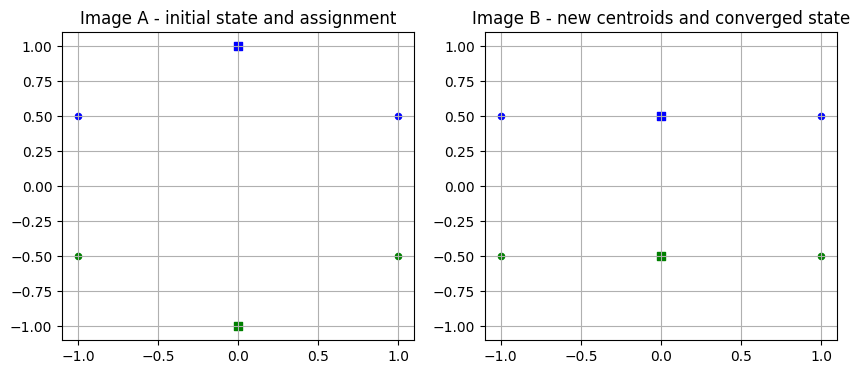

Text(0.5, 1.0, 'Image C - global minimum')

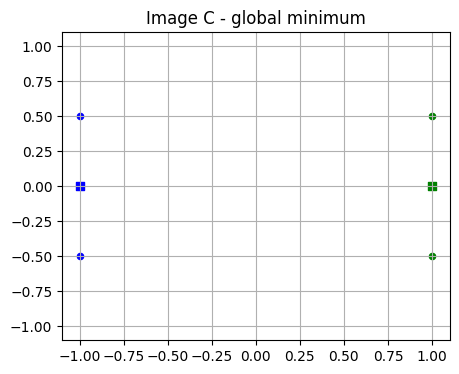

In [4]:
fig, axes = plt.subplots(1,2, figsize = (10,4))

axes[0].scatter([-1,1], [0.5,0.5], s = 20, c='b')
axes[0].scatter([-1,1], [-0.5,-0.5], s = 20, c='g')
axes[0].scatter([0], [1], s = 30, c='b', marker = 's')
axes[0].scatter([0], [-1], s = 30, c='g', marker = 's')
axes[0].set_ylim(-1.1, 1.1)
axes[0].grid()
axes[0].set_title('Image A - initial state and assignment')

axes[1].scatter([-1,1], [0.5,0.5], s = 20, c='b')
axes[1].scatter([-1,1], [-0.5,-0.5], s = 20, c='g')
axes[1].scatter([0], [0.5], s = 30, c='b', marker = 's')
axes[1].scatter([0], [-0.5], s = 30, c='g', marker = 's')
axes[1].set_ylim(-1.1, 1.1)
axes[1].grid()
axes[1].set_title('Image B - new centroids and converged state')
plt.show()

fig, axes = plt.subplots(figsize = (5,4))

axes.scatter([-1,-1], [0.5,-0.5], s = 20, c='b')
axes.scatter([1,1], [-0.5,0.5], s = 20, c='g')
axes.scatter([-1], [0], s = 30, c='b', marker = 's')
axes.scatter([1], [0], s = 30, c='g', marker = 's')
axes.set_ylim(-1.1, 1.1)
axes.grid()
axes.set_title('Image C - global minimum')


---

## 4. Gaussian Mixture Model

 * Let $\underline{X} \sim \mathcal{N}_{d} \left( \boldsymbol{\mu}_{x}, {\Sigma}_{x} \right)$ be a Gaussian Radom Vector.
 * Let $Y = {\boldsymbol{a}}^{T} \underline{X} + b$ be a random variable.


### 4.1. Question

Find ${f}_{Y} \left( y \right)$, the Probability Density Function (PDF) of $Y$ as a function of $\boldsymbol{\mu}_{x}, {\Sigma}_{x}, \boldsymbol{a}, b$.

### 4.1. Solution

As we have seen in class, if $\underline{X} \sim \mathcal{N}_{d} \left( \boldsymbol{\mu}_{x}, {\Sigma}_{x} \right)$ is a Gaussian random vector, then $Y = {\boldsymbol{a}}^{T} \underline{X}$ must be a one dimensional normally distributed random variable. This means that $Y = {\boldsymbol{a}}^{T} \underline{X} + b$ is also a one dimensional normally distributed random variable. Therefore, we only need to find the mean $\mu_y$ and the standard deviation $\sigma_y$ to fully determine the PDF ${f}_{Y} \left( y \right)$.

**Finding the mean $\mu_y$**

We note that:\
$E(\underline{X}) = E\left(\begin{bmatrix} {x}_{1} \\ x_{2} \\ \vdots \\ x_{d} \end{bmatrix}\right) = \left(\begin{bmatrix} E(x_{1}) \\ E(x_{2}) \\ \vdots \\ E(x_{d}) \end{bmatrix}\right) = \left(\begin{bmatrix} \mu_{1} \\ \mu_{2} \\ \vdots \\ \mu_{d} \end{bmatrix}\right) = \boldsymbol{\mu}_x$

$\mu_y =E(\underline{Y}) = E(a^T\underline{X} + b) = E(a_1x_1 + a_2x_2 +... + a_dx_d+b) = a_1E(x_1) + a_2E(x_2) + .. + a_dE(x_d) + b = a_1\mu_1 + a_2\mu_2 + ... + a_d\mu_d + b = \boldsymbol{a}^T\boldsymbol{\mu}_x + b$\
Where we used linearity of expectations.

**Finding the variance $\sigma_y^2$**\
$\Sigma_{x} = Var(\underline{X}) = E\left[(\underline{X}-E(\underline{X}))(\underline{X}-E(\underline{X}))^T\right]$\
If we take any matrix $a \in \mathbb{R}^{n\times d}$ we find that:\
$Var(\boldsymbol{a}^{T} \underline{X}) = E\left[(\boldsymbol{a}^{T}\underline{X}-E(\boldsymbol{a}^{T}\underline{X}))(\boldsymbol{a}^{T}\underline{X}-E(\boldsymbol{a}^{T}\underline{X}))^T\right] = E\left[(\boldsymbol{a}^{T}\underline{X}-\boldsymbol{a}^{T}E(\underline{X}))(\boldsymbol{a}^{T}\underline{X}-\boldsymbol{a}^{T}E(\underline{X}))^T\right] = E\left[(\boldsymbol{a}^{T}(\underline{X}-E(\underline{X}))(\boldsymbol{a}^{T}(\underline{X}-E(\underline{X}))^T\right] = E\left[\boldsymbol{a}^{T}(\underline{X}-E(\underline{X})(\underline{X}-E(\underline{X}))^T\boldsymbol{a}\right] = \boldsymbol{a}^{T}E\left[(\underline{X}-E(\underline{X})(\underline{X}-E(\underline{X}))^T\right]\boldsymbol{a} = \boldsymbol{a}^{T}\Sigma_{x}\boldsymbol{a} $

Then for our $\boldsymbol{a} \in \mathbb{R}^d$:\
$Var(Y) = Var(\boldsymbol{a}^{T} \underline{X} + b) = Var(\boldsymbol{a}^{T} \underline{X}) =  \boldsymbol{a}^{T}\Sigma_{x}\boldsymbol{a} = \sigma_y^2 $

In conclusion:\
$Y \sim \mathcal{N}_{d} \left( \boldsymbol{a}^T\boldsymbol{\mu}_x + b, \boldsymbol{a}^{T}\Sigma_{x}\boldsymbol{a} \right)$



---

A matrix $A \in \mathbb{R}^{d \times d}$ is called Symmetric Positive Semi Definite (SPSD) if ${A}^{T} = A$ and for any $\boldsymbol{v} \in \mathbb{R}^{d}$:

$$ \boldsymbol{v}^{T} A \boldsymbol{v} \geq 0 $$

### 4.2. Question

Let $\underline{X}$ be a random vector with covariance matrix ${\Sigma}_{x}$. Show that ${\Sigma}_{x}$ is an SPSD matrix.

${\Sigma}_{x}$ is a symmetric matrix, since $\Sigma_{x(ij)} = Cov(x_i,x_j) = E\left[(x_i-E(x_i))(x_j-E(x_j))\right] = E\left[(x_j-E(x_j))(x_i-E(x_i))\right] = Cov(x_j,x_i) = \Sigma_{x(ji)}$

The expectancy calculation here is of a multiplication of scalars.

Now assume $\underline{X}$ is a random variable with covariance matrix ${\Sigma}_{x}$.\
According to what we showed in 4.1, for any $ \boldsymbol{v}\in \mathbb{R}^d$, the transformation $Y = \boldsymbol{v}^T\underline{X}$ defines a random variable $Y$ such that $Var(Y) = \boldsymbol{v}^T {\Sigma}_{x}\boldsymbol{v}$.\
Since by definition $Var(Y) \geq0$, this implies:\
$\boldsymbol{v}^T {\Sigma}_{x}\boldsymbol{v} \geq0 \quad \forall \boldsymbol{v}\in \mathbb{R}^d$

In conclusion, the covariance matrix $\Sigma_{x}$ is an SPSD.

---

## 5. Hierarchical Clustering

The _complete linkage distance_ between the 2 clusters $\mathcal{C}_{1} = {\left\{ \boldsymbol{x}_{i} \right\}}_{i = 1}^{{N}_{1}}$ and $\mathcal{C}_{2} = {\left\{ \boldsymbol{x}_{j} \right\}}_{j = 1}^{{N}_{2}}$:

$$ {d}^{2}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = \begin{cases}
0 & \text{ if } \mathcal{C}_{1} = \mathcal{C}_{2} \\ 
\max_{\boldsymbol{x}_{i} \in \mathcal{C}_{1}, \boldsymbol{x}_{j} \in \mathcal{C}_{2}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\| & \text{ if } \mathcal{C}_{1} \neq \mathcal{C}_{2}
\end{cases} $$

### 5.1. Question

Prove that the complete linkage is indeed a metric.

### 5.1. Solution

- **Non-negativity**\
It is clear from the definition that the complete linkage distance can never be negative. It is either $0$ or the absolute euclidean distance between two vectors.\
Furthermore, ${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = 0 \iff \mathcal{C}_{1}= \mathcal{C}_{2}$\
By definition, if $\mathcal{C}_{1}= \mathcal{C}_{2}$, then ${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = 0$\
In the other direction, suppose $\mathcal{C}_{1}\neq \mathcal{C}_{2}$\
$\max_{\boldsymbol{x}_{i} \in \mathcal{C}_{1}, \boldsymbol{x}_{j} \in \mathcal{C}_{2}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\|=0 \implies \boldsymbol{x}_{i} = \boldsymbol{x}_{j}$, since the euclidean distance is a metric.\
Since we have hard assignments this is a contradiction to our assumption that $\mathcal{C}_{1}\neq \mathcal{C}_{2}$\
so ${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = 0 \implies \mathcal{C}_{1}= \mathcal{C}_{2}$

- **Symmetry**\
${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = \max_{\boldsymbol{x}_{i} \in \mathcal{C}_{1}, \boldsymbol{x}_{j} \in \mathcal{C}_{2}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\| = \max_{\boldsymbol{x}_{j} \in \mathcal{C}_{1}, \boldsymbol{x}_{i} \in \mathcal{C}_{2}} \left\| \boldsymbol{x}_{j} - \boldsymbol{x}_{i} \right\| = {d}_{\text{Complete Link}} \left( \mathcal{C}_{2}, \mathcal{C}_{1} \right)$\
Since the euclidean distance is symmetric.
- **Triangle inequality**\
We need to show that for any three different clusters $\mathcal{C}_{1}, \mathcal{C}_{2}, \mathcal{C}_{3}:$\
${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) \leq {d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{3} \right) + {d}_{\text{Complete Link}} \left( \mathcal{C}_{3}, \mathcal{C}_{2} \right)$\
Proof:\
Suppose $\boldsymbol{c}_1 \in \mathcal{C}_{1}, \boldsymbol{c}_2 \in \mathcal{C}_{2}$ are the vectors that define the distance between $\mathcal{C}_{1}$ and $\mathcal{C}_{2}$ so that:\
${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = \left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{2} \right\|$\
Next we can take any vector $\boldsymbol{c}_3 \in \mathcal{C}_{3}$\
On one hand, from the euclidean metric we know that:\
$\left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{2} \right\| \leq \left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{3} \right\| + \left\| \boldsymbol{c}_{3} - \boldsymbol{c}_{2} \right\|$\
On the other hand:\
$\left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{3} \right\| \leq \max_{\boldsymbol{x}_{i} \in \mathcal{C}_{1}, \boldsymbol{x}_{j} \in \mathcal{C}_{3}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\| = {d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{3} \right)$\
and\
$\left\| \boldsymbol{c}_{3} - \boldsymbol{c}_{2} \right\| \leq \max_{\boldsymbol{x}_{i} \in \mathcal{C}_{3}, \boldsymbol{x}_{j} \in \mathcal{C}_{2}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\| = {d}_{\text{Complete Link}} \left( \mathcal{C}_{3}, \mathcal{C}_{2} \right)$\
in conclusion:\
${d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = \left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{2} \right\| \leq \left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{3} \right\| + \left\| \boldsymbol{c}_{3} - \boldsymbol{c}_{2} \right\| \leq {d}_{\text{Complete Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{3} \right) +{d}_{\text{Complete Link}} \left( \mathcal{C}_{3}, \mathcal{C}_{2} \right) $

With the above conditions met, the complete linkage is a metric

---

 * The _single linkage dissimilarity_ between the 2 clusters $\mathcal{C}_{1} = {\left\{ \boldsymbol{x}_{i} \right\}}_{i = 1}^{{N}_{1}}$ and $\mathcal{C}_{2} = {\left\{ \boldsymbol{x}_{j} \right\}}_{j = 1}^{{N}_{2}}$:

$$ {d}^{2}_{\text{Single Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{2} \right) = \min_{\boldsymbol{x}_{i} \in \mathcal{C}_{1}, \boldsymbol{x}_{j} \in \mathcal{C}_{2}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\| $$

 * The _Lance Williams_ update rule is given by: ${D}_{\overline{ij}, k} = {\alpha}_{i} {D}_{i, k} + {\alpha}_{j} {D}_{j, k} + \beta {D}_{i, j} + \gamma \left| {D}_{i, k} - {D}_{j, k} \right|$.

### 5.2. Question

Consider 3 clusters $\mathcal{C}_{1}, \mathcal{C}_{2}, \mathcal{C}_{3}$ with ${D}_{i, j} = {d}_{\text{Single Link}} \left( \mathcal{C}_{i}, \mathcal{C}_{j} \right)$.  
Prove that:

$$ {D}_{\overline{12}, 3} = {d}_{\text{Single Link}} \left( \mathcal{C}_{1} \cup \mathcal{C}_{2}, \mathcal{C}_{3} \right) $$

In other words, show that the _Lance Williams_ algorithm is correct for the _single linkage dissimilarity_.

### 5.2. Solution
We will show that the Lance Williams update rule is correct for single linkage with:
${\alpha}_{i} = \frac 1 2 ,{\alpha}_{j} = \frac 1 2, \beta = 0, \gamma = -\frac 1 2$.

${d}_{\text{Single Link}} \left( \mathcal{C}_{1} \cup \mathcal{C}_{2}, \mathcal{C}_{3} \right) = \min_{\boldsymbol{x}_{i} \in \mathcal{C}_{1} \cup \mathcal{C}_{2}, \boldsymbol{x}_{j} \in \mathcal{C}_{3}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\|$

Suppose $\boldsymbol{c}_1 \in \mathcal{C}_{1}, \boldsymbol{c}_3 \in \mathcal{C}_{3}$ are the vectors that define the distance between $\mathcal{C}_{1}$ and $\mathcal{C}_{3}$ so that:\
${d}_{\text{Single Link}} \left( \mathcal{C}_{1}, \mathcal{C}_{3} \right) = \left\| \boldsymbol{c}_{1} - \boldsymbol{c}_{3} \right\| = D_{1,3}$\
Similarly, suppose $\boldsymbol{c}_2 \in \mathcal{C}_{2}, \acute{\boldsymbol{c}}_3 \in \mathcal{C}_{3}$ are the vectors that define the distance between $\mathcal{C}_{2}$ and $\mathcal{C}_{3}$ so that:\
${d}_{\text{Single Link}} \left( \mathcal{C}_{2}, \mathcal{C}_{3} \right) = \left\| \boldsymbol{c}_{2} - \acute{\boldsymbol{c}}_{3} \right\| = D_{2,3}$\
Since $c_1, c_2 \in \mathcal{C}_{1} \cup \mathcal{C}_{2}$, it is clear that\
${d}_{\text{Single Link}} \left( \mathcal{C}_{1} \cup \mathcal{C}_{2}, \mathcal{C}_{3} \right) = \min_{\boldsymbol{x}_{i} \in \mathcal{C}_{1} \cup \mathcal{C}_{2}, \boldsymbol{x}_{j} \in \mathcal{C}_{3}} \left\| \boldsymbol{x}_{i} - \boldsymbol{x}_{j} \right\| = min(D_{1,3}, D_{2,3})$

With the Lance-Williams update we get:\
${D}_{\overline{12}, 3} = \frac 1 2 D_{1,3} + \frac 1 2 D_{2, 3} -\frac 1 2 \left| {D}_{1, 3} - {D}_{2, 3} \right|$\
Without loss of generality, suppose $D_{1,3} \geq D_{2,3}$, then\
${D}_{\overline{12}, 3} = \frac 1 2 D_{1,3} + \frac 1 2 D_{2, 3} -\frac 1 2 \left( {D}_{1, 3} - {D}_{2, 3} \right) = D_{2,3} = min(D_{1,3}, D_{2,3})$

Either way, we get the minimum. Therefore:\
${D}_{\overline{12}, 3} = min(D_{1,3}, D_{2,3}) = {d}_{\text{Single Link}} \left( \mathcal{C}_{1} \cup \mathcal{C}_{2}, \mathcal{C}_{3} \right)$


---